# Trash sorting the right wAI

## 1 Table of contents:<a name="index"></a>
1. [Table of contents](#index) <br>
2. [Import libraries](#2) <br>
3. [Load data](#3) <br>
    3.1 [Load, transform and split data](#3.1) <br>
    3.2 [Visualise transformed images](#3.2) <br>
4. [Load Model](#4) <br>
5. [Model Training](#5) <br>
    5.1 [Set tuning parameters](#5.1) <br>
    5.2 [Create training loop](#5.2) <br>
    5.3 [Rund training loop](#5.3) <br>
6. [Visualise model predictions](#6) <br>
    6.1 [Predict class probabilites for one image](#6.1) <br>
    6.2 [Predict labels for folder of images](#6.2) <br>
7. [Evaluate Model](#7) <br>

## 2. Import libraries <a name="2"></a>
Import necessary libraries for data-handling, plotting, modeling.
[↑ back to top ↑](#index)

In [70]:
import numpy as np
import pandas as pd
import torch
from torch import nn
from torch import optim
import torch.nn.functional as F
import torchvision.transforms.functional as TF
import torchvision
from torchvision import transforms, datasets
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import demo 

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

## 3. Load model, test-data and setup<a name="3"></a>
[↑ back to top ↑](#index)

In [71]:
model_name = 'resnet18_v3'
model_path = "model/" + str(model_name) + ".pickle"

try:
    with open(model_path,'rb') as fp:
        model = pickle.load(fp)
    print(f"Model '{model_name}' loaded from file:", model_path)
except:
    print("Couldn't find model. Created new resnet18-model.")

Model 'resnet18_v3' loaded from file: model/resnet18_v3.pickle


In [72]:
data_transformer = transforms.Compose([transforms.Resize(224),
                                       transforms.CenterCrop(224), 
                                       transforms.ToTensor(),
                                        ])

data_set = datasets.ImageFolder(root='data/dataset-resized', transform=data_transformer)
classes = data_set.classes

#load test_set from file (saved after train, val, test-set split in training-notebook)
with open("data/test_set.pickle",'rb') as fp:
    test_set = pickle.load(fp)
loader_test = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)

demo_set = datasets.ImageFolder(root='data/single_img', transform=data_transformer)
classes

['cardboard', 'glass', 'metal', 'paper', 'plastic', 'trash']

In [73]:
def transform_show(transformer, batch = 1, no_row = 4, width = 8, height = 8):
    test_set = datasets.ImageFolder(root='data/single_img', transform=transformer)
    loader = torch.utils.data.DataLoader(test_set, batch_size=batch, shuffle=True)

    images, _ = next(iter(loader))
    grid = torchvision.utils.make_grid(images, nrow = no_row)

    plt.figure(figsize=(width, height))
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    return

In [74]:
def prob_classes(classes=classes, set = demo_set, batch = 1):
    loader_demo = torch.utils.data.DataLoader(set, batch_size=batch, shuffle=True)

    images, labels = next(iter(loader_demo))
    grid = torchvision.utils.make_grid(images, nrow=8)

    with torch.no_grad():
        
        images_pred = model(images)
        pred_label = np.argmax(images_pred)
        prob = torch.softmax(images_pred, dim=1)

    plt.figure(figsize=(5, 5))
    plt.imshow(np.transpose(grid, (1, 2, 0)))
    plt.show()

    print("Predicted label:", classes[int(pred_label)])
    print()
    print("Predicted probabilities:")

        
    for i in range(6):
        print( round(float(prob[0][i])*100, 2), "%       ",classes[i])


In [75]:
folder_path = 'data/demonstrate/'

In [76]:
def show(folder_path, batch_size):

    demo_set = datasets.ImageFolder(root=folder_path, transform=data_transformer)
    loader_demo = torch.utils.data.DataLoader(demo_set, batch_size=batch_size, shuffle=False)
    bins = ["paper bin", "glass container", "recycling bin", "paper bin", "recycling bin", "trash bin"]

    for batch, (images,labels) in enumerate(loader_demo):

        with torch.no_grad():         
            outputs = model(images)
                
        fix, axs = plt.subplots(ncols=len(images), squeeze=False, figsize=(24,4))

        
        for i, img in enumerate(images):
            
            try:
                pred_label = "Predicted: "+ classes[int(np.argmax(outputs[i]))]
                pred_bin = "Please put in " + bins[int(np.argmax(outputs[i]))]
            except:
                pred_label = "Couldn't predict"
                pred_bin = "Please put in " + bins[5]
            
            img = img.detach()
            img = TF.to_pil_image(img)
            axs[0, i].imshow(np.asarray(img))
            axs[0, i].set(xticklabels=[], yticklabels=[], xticks=[], title=pred_label, xlabel = pred_bin)

## 4. Transform images
Original image

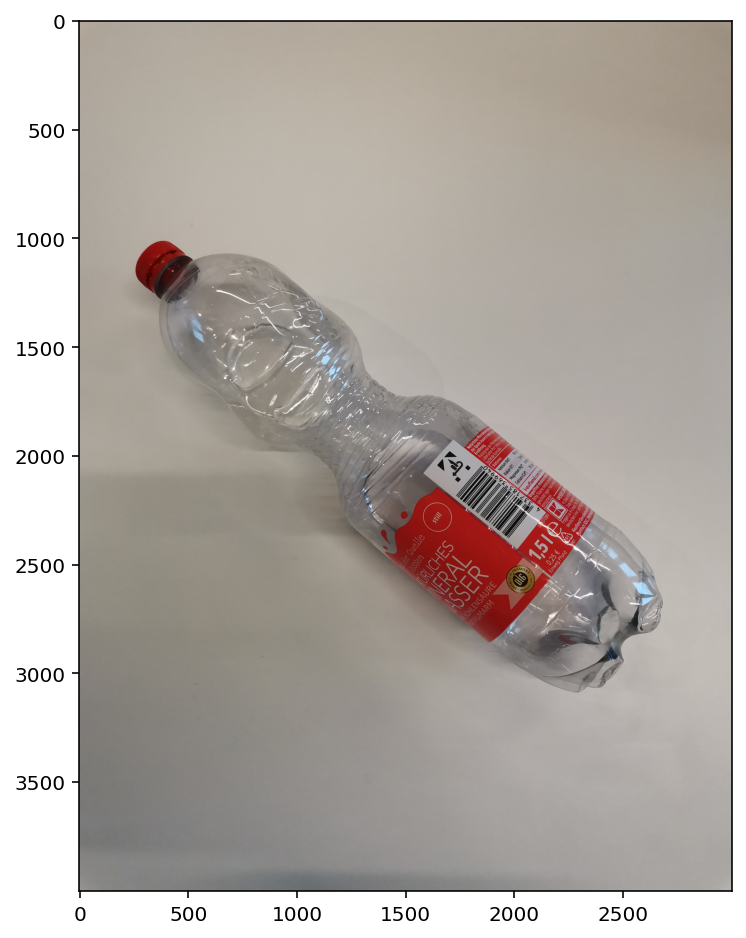

In [77]:
transformer = transforms.Compose([transforms.ToTensor()])
transform_show(transformer)


Resize to 224 (shorter side).

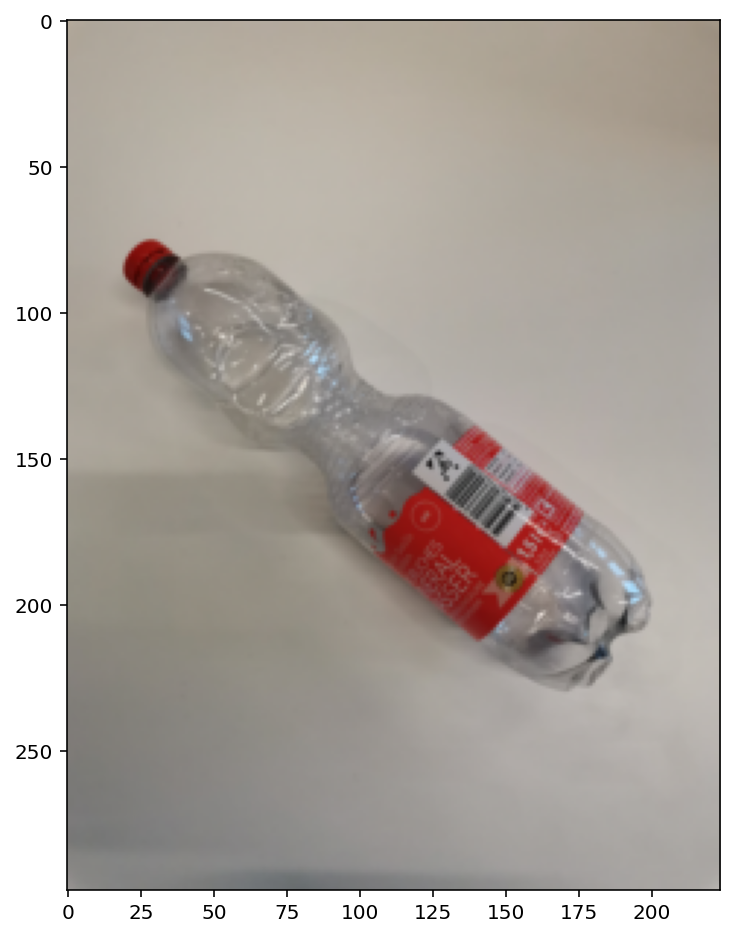

In [78]:
transformer = transforms.Compose([transforms.Resize(224),
                                transforms.ToTensor()])
transform_show(transformer)

Cropped to 224x224.

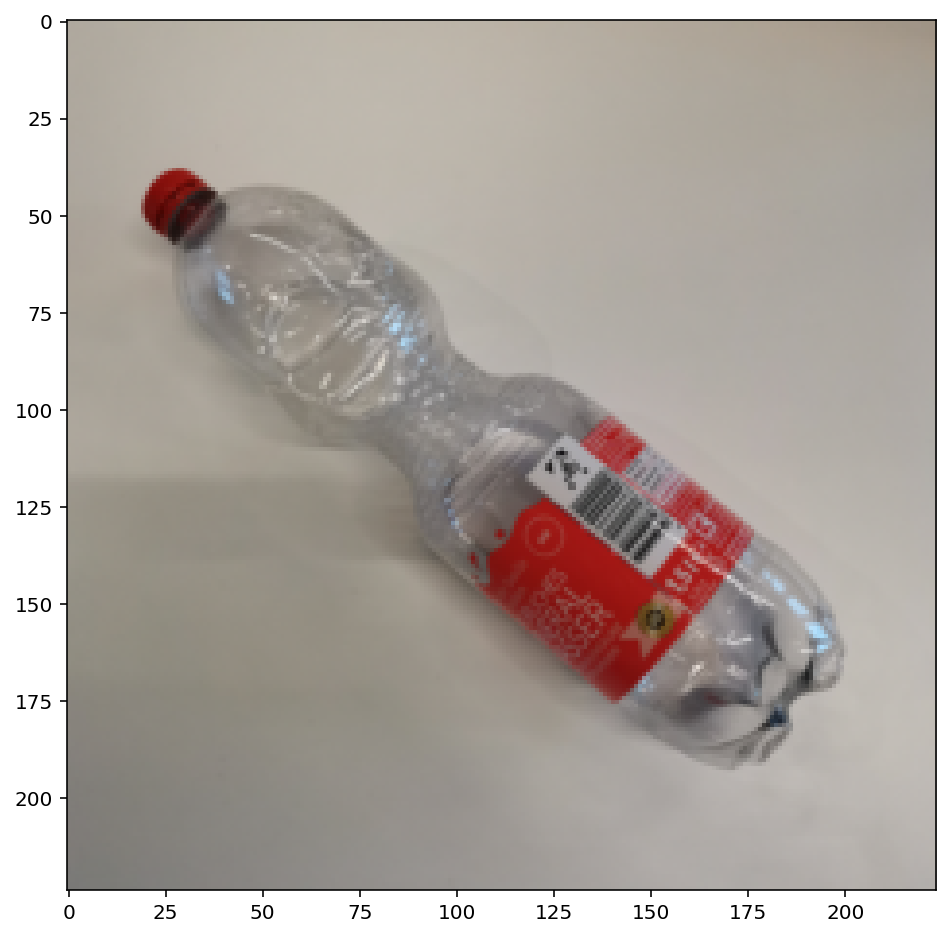

In [79]:
transformer = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224), 
                                transforms.ToTensor()])
transform_show(transformer)

 Stored as tensor.


In [80]:
transformer = transforms.Compose([transforms.Resize(224),
                                transforms.CenterCrop(224), 
                                transforms.ToTensor()])
test_set = datasets.ImageFolder(root='data/demonstrate', transform=transformer)
loader = torch.utils.data.DataLoader(test_set, batch_size=1, shuffle=True)
images, _ = next(iter(loader))
print(images.size())
images

torch.Size([1, 3, 224, 224])


tensor([[[[0.6863, 0.6824, 0.6863,  ..., 0.6235, 0.6235, 0.6235],
          [0.6863, 0.6863, 0.6863,  ..., 0.6235, 0.6235, 0.6275],
          [0.6863, 0.6863, 0.6863,  ..., 0.6235, 0.6235, 0.6235],
          ...,
          [0.4824, 0.4824, 0.4784,  ..., 0.6980, 0.6980, 0.7020],
          [0.4784, 0.4784, 0.4784,  ..., 0.6941, 0.6980, 0.7020],
          [0.4784, 0.4784, 0.4784,  ..., 0.6980, 0.7020, 0.6980]],

         [[0.6627, 0.6588, 0.6627,  ..., 0.5804, 0.5804, 0.5804],
          [0.6627, 0.6588, 0.6627,  ..., 0.5804, 0.5765, 0.5804],
          [0.6588, 0.6588, 0.6588,  ..., 0.5804, 0.5765, 0.5804],
          ...,
          [0.4784, 0.4784, 0.4745,  ..., 0.6824, 0.6863, 0.6863],
          [0.4745, 0.4745, 0.4745,  ..., 0.6824, 0.6863, 0.6863],
          [0.4745, 0.4745, 0.4745,  ..., 0.6863, 0.6863, 0.6863]],

         [[0.6235, 0.6196, 0.6196,  ..., 0.5216, 0.5216, 0.5176],
          [0.6235, 0.6196, 0.6196,  ..., 0.5216, 0.5216, 0.5255],
          [0.6196, 0.6196, 0.6196,  ..., 0

## 5 Calculate probabilities for classes<a name="5"></a>
[↑ back to top ↑](#index)

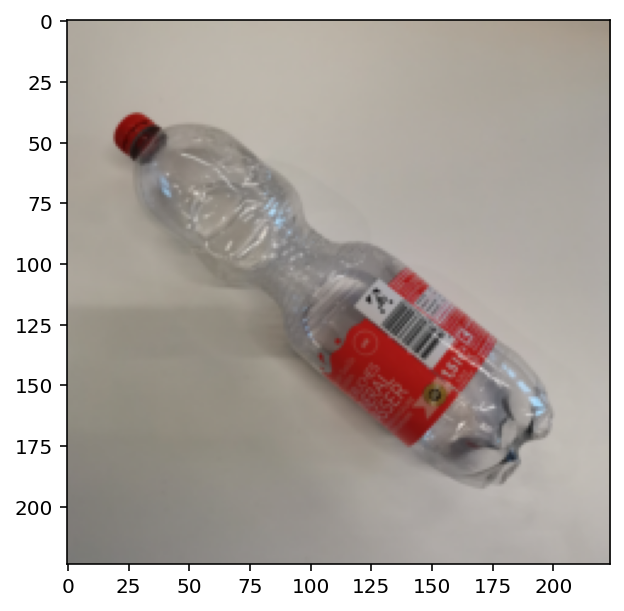

Predicted label: plastic

Predicted probabilities:
0.0 %        cardboard
2.81 %        glass
0.89 %        metal
0.16 %        paper
95.68 %        plastic
0.01 %        trash


In [81]:
prob_classes()

## 6 Predict labels for images in folder <a name="6"></a>
Load set of images and run model for classification. Gives correct bin for garbage on image.<br><br>
[↑ back to top ↑](#index)

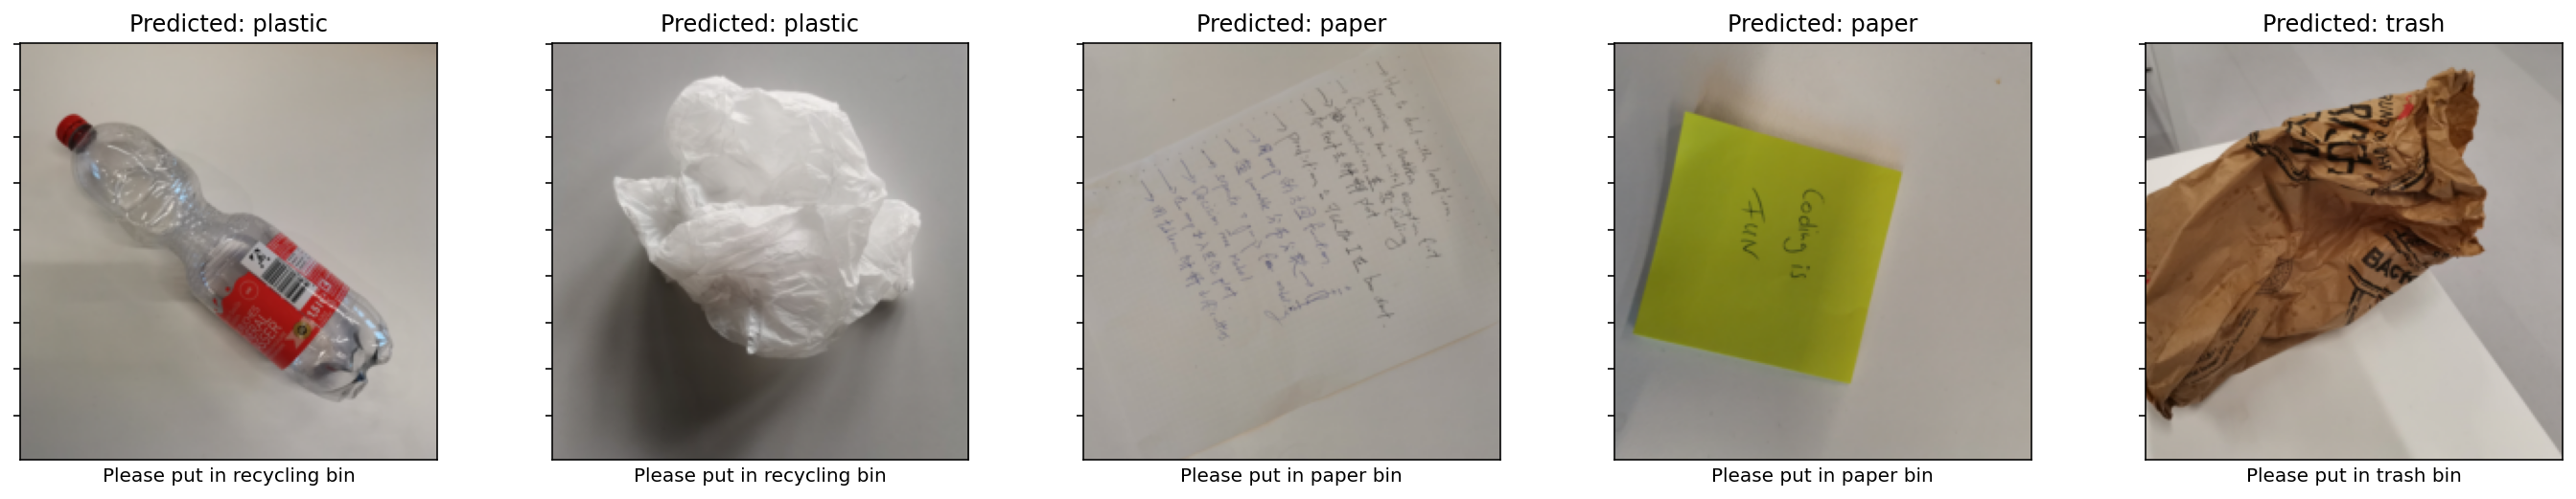

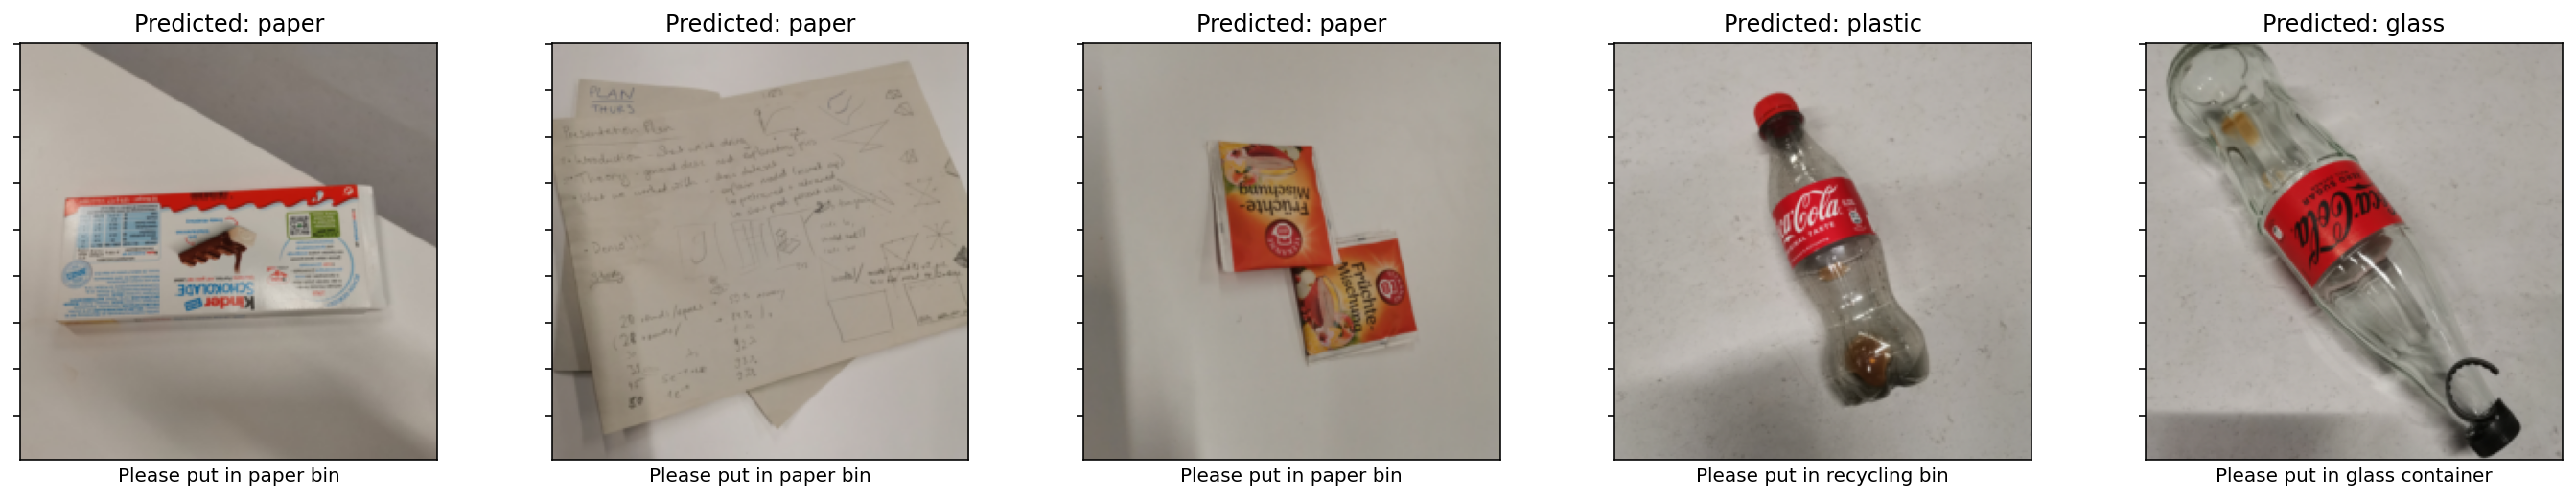

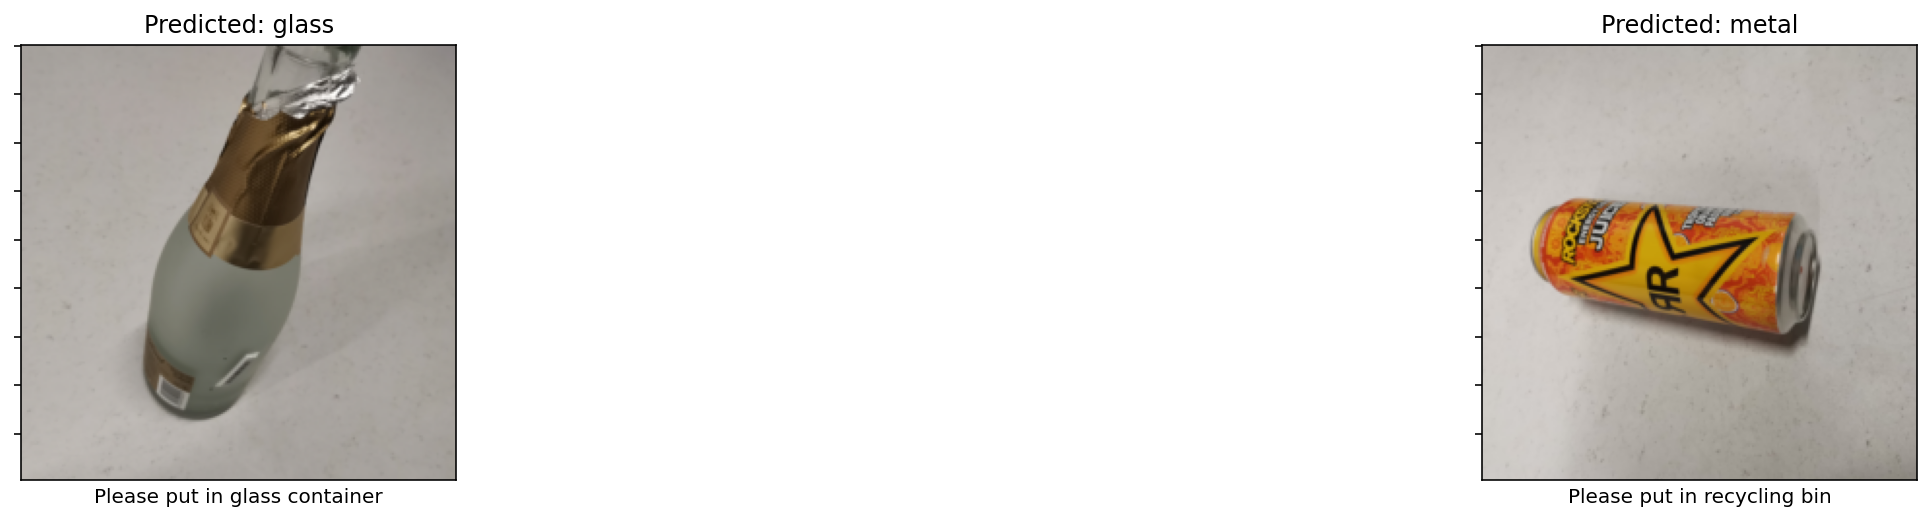

In [82]:
show(folder_path, 5)

## 7. Evaluate Model<a name="7"></a>
Calculate accuracy and plot confusion matrix for test-set.<br>
[↑ back to top ↑](#index)

Accuracy of the model on the test-set: 97 %


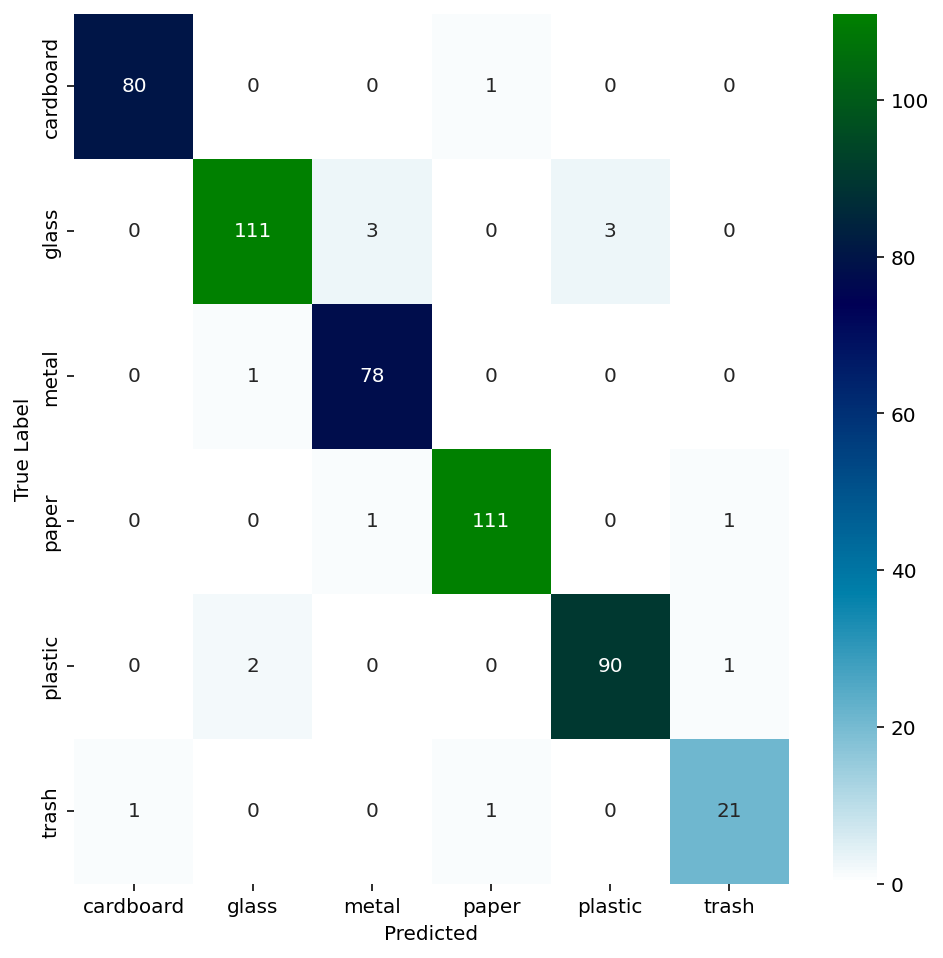

In [83]:
with torch.no_grad():

    correct = 0
    total = 0
    predicted_label = []
    label = []

    for batch, (images, labels) in enumerate(loader_test):
        outputs = model(images)
        predicted = np.argmax(outputs)

        total += labels.size(0)
        correct += (predicted == labels).sum().item()

        class_label = classes[int(labels)]
        pred_label = classes[int(predicted)]

        label.append(class_label)
        predicted_label.append(pred_label)

    con_matr = confusion_matrix(label, predicted_label)

print('Accuracy of the model on the test-set: %d %%' % (100 * correct / total))

df_con_matr = pd.DataFrame(con_matr, classes, classes)
plt.figure(figsize = (8,8))
sns.heatmap(df_con_matr, annot= True, fmt="d", cmap="ocean_r")
plt.xlabel("Predicted")
plt.ylabel("True Label")
plt.show()